## A.I. Assignment 5

## Learning Goals

By the end of this lab, you should be able to:
* Get more familiar with tensors in pytorch 
* Create a simple multilayer perceptron model with pytorch
* Visualise the parameters


### Task

Build a fully connected feed forward network that adds two bits. Determine the a propper achitecture for this network (what database you use for this problem? how many layers? how many neurons on each layer? what is the activation function? what is the loss function? etc)

Create at least 3 such networks and compare their performance (how accurate they are?, how farst they are trained to get at 1 accuracy?)

Display for the best one the weights for each layer.


In [1]:
import torch
import torch.nn as nn
from collections import OrderedDict


In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np

# Data preparation
X_train = torch.tensor([[0, 0], [0, 1], [1, 0], [1, 0]], dtype=torch.float32)
y_train = torch.tensor([[0], [1], [1], [0]], dtype=torch.float32)

class SimpleAdditionModel(nn.Module):
    def __init__(self):
        super(SimpleAdditionModel, self).__init__()
        self.fc1 = nn.Linear(2, 2)
        self.fc2 = nn.Linear(2, 1)
        
    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.sigmoid(self.fc2(x))
        return x

class ModerateAdditionModel(nn.Module):
    def __init__(self):
        super(ModerateAdditionModel, self).__init__()
        self.fc1 = nn.Linear(2, 4)
        self.fc2 = nn.Linear(4, 4)
        self.fc3 = nn.Linear(4, 1)
        
    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.sigmoid(self.fc3(x))
        return x

class ComplexAdditionModel(nn.Module):
    def __init__(self):
        super(ComplexAdditionModel, self).__init__()
        self.fc1 = nn.Linear(2, 8)
        self.fc2 = nn.Linear(8, 8)
        self.fc3 = nn.Linear(8, 8)
        self.fc4 = nn.Linear(8, 1)
        
    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.relu(self.fc3(x))
        x = torch.sigmoid(self.fc4(x))
        return x

# Function to train the model
def train_model(model, X_train, y_train, num_epochs=1000, lr=0.01):
    criterion = nn.BCELoss()
    optimizer = optim.Adam(model.parameters(), lr=lr)
    for epoch in range(num_epochs):
        model.train()
        optimizer.zero_grad()
        outputs = model(X_train)
        loss = criterion(outputs, y_train)
        loss.backward()
        optimizer.step()
        if epoch % 100 == 0:
            print(f"Epoch {epoch+1}/{num_epochs}, Loss: {loss.item():.4f}")
    print('Training finished.')

# Train the models
simple_model = SimpleAdditionModel()
moderate_model = ModerateAdditionModel()
complex_model = ComplexAdditionModel()

print("Training Simple Model:")
train_model(simple_model, X_train, y_train)
print("\nTraining Moderate Model:")
train_model(moderate_model, X_train, y_train)
print("\nTraining Complex Model:")
train_model(complex_model, X_train, y_train)

# Function to evaluate accuracy
def evaluate_accuracy(model, X_train, y_train):
    with torch.no_grad():
        model.eval()
        outputs = model(X_train)
        predicted = torch.round(outputs)
        correct = (predicted == y_train).sum().item()
        total = y_train.size(0)
        accuracy = correct / total
    return accuracy

# Evaluate the models
simple_accuracy = evaluate_accuracy(simple_model, X_train, y_train)
moderate_accuracy = evaluate_accuracy(moderate_model, X_train, y_train)
complex_accuracy = evaluate_accuracy(complex_model, X_train, y_train)

print("\nAccuracy:")
print(f"Simple Model: {simple_accuracy:.2%}")
print(f"Moderate Model: {moderate_accuracy:.2%}")
print(f"Complex Model: {complex_accuracy:.2%}")

# Display weights for the best model (Complex Model)
def display_weights(model):
    for name, param in model.named_parameters():
        if 'weight' in name:
            print(name, param.data)

print("\nWeights for Complex Model:")
display_weights(complex_model)


Training Simple Model:
Epoch 1/1000, Loss: 0.7596
Epoch 101/1000, Loss: 0.6093
Epoch 201/1000, Loss: 0.5129
Epoch 301/1000, Loss: 0.4896
Epoch 401/1000, Loss: 0.4835
Epoch 501/1000, Loss: 0.4812
Epoch 601/1000, Loss: 0.4797
Epoch 701/1000, Loss: 0.4791
Epoch 801/1000, Loss: 0.4787
Epoch 901/1000, Loss: 0.4787
Training finished.

Training Moderate Model:
Epoch 1/1000, Loss: 0.6929
Epoch 101/1000, Loss: 0.0971
Epoch 201/1000, Loss: 0.0073
Epoch 301/1000, Loss: 0.0029
Epoch 401/1000, Loss: 0.0016
Epoch 501/1000, Loss: 0.0010
Epoch 601/1000, Loss: 0.0007
Epoch 701/1000, Loss: 0.0005
Epoch 801/1000, Loss: 0.0004
Epoch 901/1000, Loss: 0.0003
Training finished.

Training Complex Model:
Epoch 1/1000, Loss: 0.7029
Epoch 101/1000, Loss: 0.0028
Epoch 201/1000, Loss: 0.0005
Epoch 301/1000, Loss: 0.0002
Epoch 401/1000, Loss: 0.0001
Epoch 501/1000, Loss: 0.0001
Epoch 601/1000, Loss: 0.0001
Epoch 701/1000, Loss: 0.0000
Epoch 801/1000, Loss: 0.0000
Epoch 901/1000, Loss: 0.0000
Training finished.

Accu

In [3]:
print(complex_model)

ComplexAdditionModel(
  (fc1): Linear(in_features=2, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=8, bias=True)
  (fc3): Linear(in_features=8, out_features=8, bias=True)
  (fc4): Linear(in_features=8, out_features=1, bias=True)
)


In [5]:
import torch

# Define the input data
data_in = torch.tensor([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=torch.float32)

# Load the trained model (Complex Model)
complex_model = ComplexAdditionModel()

# Evaluate the model to predict the output
with torch.no_grad():
    complex_model.eval()
    output = complex_model(data_in)

print("Predicted outputs:")
print(output)



Predicted outputs:
tensor([[0.5339],
        [0.5342],
        [0.5335],
        [0.5328]])


In [6]:
# Define the target data
data_target = torch.tensor([[0], [1], [1], [0]], dtype=torch.float32)

# Print the target data
print("Target outputs:")
print(data_target)


Target outputs:
tensor([[0.],
        [1.],
        [1.],
        [0.]])


In [7]:
# Define the criterion
criterion = nn.BCELoss()

# Define the optimizer
optimizer = optim.Adam(complex_model.parameters(), lr=0.01)


In [8]:
# Train the model
def train_model(model, X_train, y_train, criterion, optimizer, num_epochs=1000):
    for epoch in range(num_epochs):
        model.train()
        optimizer.zero_grad()
        outputs = model(X_train)
        loss = criterion(outputs, y_train)
        loss.backward()
        optimizer.step()
        if epoch % 100 == 0:
            print(f"Epoch {epoch+1}/{num_epochs}, Loss: {loss.item():.4f}")
        # Check for early stopping if accuracy is reached
        if evaluate_accuracy(model, X_train, y_train) == 1.0:
            print(f"Accuracy 1.0 reached at epoch {epoch+1}/{num_epochs}")
            break
    print('Training finished.')

# Train the model
train_model(complex_model, data_in, data_target, criterion, optimizer)


Epoch 1/1000, Loss: 0.6949
Accuracy 1.0 reached at epoch 60/1000
Training finished.


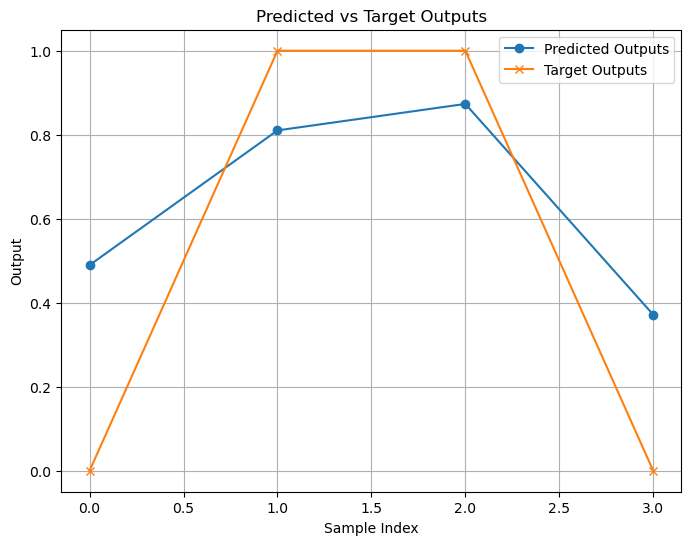

In [9]:
import matplotlib.pyplot as plt

# Predict the outputs
with torch.no_grad():
    complex_model.eval()
    predicted_outputs = complex_model(data_in)

# Convert tensors to numpy arrays for plotting
predicted_outputs_np = predicted_outputs.numpy()
target_outputs_np = data_target.numpy()

# Plot the results
plt.figure(figsize=(8, 6))
plt.plot(predicted_outputs_np, label='Predicted Outputs', marker='o')
plt.plot(target_outputs_np, label='Target Outputs', marker='x')
plt.xlabel('Sample Index')
plt.ylabel('Output')
plt.title('Predicted vs Target Outputs')
plt.legend()
plt.grid(True)
plt.show()


In [10]:
# Function to display weights for each layer
def display_weights(model):
    for name, param in model.named_parameters():
        if 'weight' in name:
            print(name, param.data)

# Display weights for the complex model
print("\nWeights for Complex Model:")
display_weights(complex_model)



Weights for Complex Model:
fc1.weight tensor([[ 0.2159, -0.6857],
        [ 0.1997,  0.1497],
        [-0.4683,  0.6225],
        [ 0.2296, -0.0349],
        [ 0.9980, -0.9022],
        [ 0.6020,  0.6092],
        [ 0.5345, -0.6645],
        [-0.5810,  0.2207]])
fc2.weight tensor([[-0.3074, -0.3035, -0.2455,  0.2925, -0.1319, -0.0545,  0.0828,  0.2343],
        [ 0.1889, -0.1753, -0.1566,  0.2918, -0.0506, -0.2036,  0.0833, -0.3286],
        [ 0.2029,  0.0789, -0.0738, -0.1413, -0.1514,  0.0313, -0.3521, -0.0087],
        [ 0.0957,  0.0617,  0.5184,  0.3323,  1.0185, -0.6648, -0.6244, -0.2764],
        [ 0.3416, -0.2512, -0.1554, -0.1392,  0.0469, -0.0552, -0.2402,  0.2615],
        [-0.1514,  0.2639, -0.3023,  0.0789,  0.0308,  0.3154, -0.2335, -0.2641],
        [-0.2855,  0.3482, -0.4736, -0.2405,  0.9840, -0.6521,  0.6085, -0.3012],
        [-0.1276, -0.0449,  0.0722,  0.2126, -0.6591,  0.8561,  0.6382,  0.0762]])
fc3.weight tensor([[ 0.1056, -0.2664,  0.1050, -0.1413, -0.0475,  0.